### DATA PRE-PROCESSING

***This notebook is created for presentation purposes, the script ../src/data_pre_processing.py is used to pre-process data***

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

### Load data for preprocessing

In [2]:
data_train  = pd.read_csv("../data/alt_maccsfp.csv")


### Present basic information about the loaded data

We have loaded data regarding the value of the ALT parameter in chemical compounds represented by MACCSFP fingerprints. In the ALT column we have the ALT (Aminotransferase) value, which we can interpret as an indicator of liver damage. In the following columns, we have successive bits of the MACCSFP fingerprint, where each bit represents whether a specific substructure exists in the given chemical compound.


In [3]:
data_train

,ALT,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,32.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,37.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2,2.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,3.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,44.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,38.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
94,32.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
95,53.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
96,34.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [4]:
data_train.describe()

,ALT,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
count,98.000000,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.0
mean,47.119898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.612245,0.959184,0.714286,0.642857,0.959184,0.867347,0.908163,0.826531,0.989796,0.0
std,45.294039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.489743,0.198882,0.454077,0.481621,0.198882,0.340943,0.290280,0.380599,0.101015,0.0
min,1.510000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,29.775000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
50%,36.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
75%,49.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,273.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


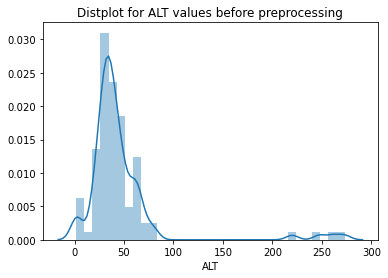

In [5]:
sns.distplot(data_train['ALT']).set(title='Distplot for ALT values before preprocessing');

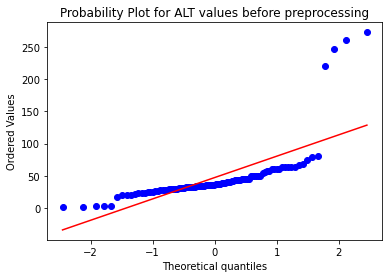

In [6]:
fig = plt.figure()
stats.probplot(data_train['ALT'], plot=plt)
plt.title('Probability Plot for ALT values before preprocessing')
plt.show()

### Delete columns with a variance equal to zero

We remove columns from our dataset where the variance of the ALT value is equal to 0. Such columns do not give us any additional information.

In [7]:
data_train.drop(columns=data_train.columns[data_train.var() == 0], inplace=True)
data_train.reset_index(drop=True, inplace=True)


### Log the values of the ALT parameter

We cannot remove the highest ALT values because they are the most important - they indicate toxicity. However, such outliers could have a negative impact on the model, so we have logarithmised the values of the ALT parameter.

In [8]:
data_train['ALT'] = np.log(data_train['ALT'])

### Present basic information about the data after preprocessing

In [9]:
data_train

,ALT,MACCSFP11,MACCSFP16,MACCSFP23,MACCSFP24,MACCSFP25,MACCSFP26,MACCSFP28,MACCSFP29,MACCSFP30,...,MACCSFP156,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165
0,3.484312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,3.616309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1.071584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.150572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,3.786460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,3.645450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
94,3.465736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
95,3.980616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
96,3.540959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [10]:
data_train.describe()

,ALT,MACCSFP11,MACCSFP16,MACCSFP23,MACCSFP24,MACCSFP25,MACCSFP26,MACCSFP28,MACCSFP29,MACCSFP30,...,MACCSFP156,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,3.574207,0.081633,0.163265,0.051020,0.122449,0.091837,0.051020,0.020408,0.010204,0.010204,...,0.836735,0.612245,0.959184,0.714286,0.642857,0.959184,0.867347,0.908163,0.826531,0.989796
std,0.815340,0.275212,0.371508,0.221171,0.329489,0.290280,0.221171,0.142119,0.101015,0.101015,...,0.371508,0.489743,0.198882,0.454077,0.481621,0.198882,0.340943,0.290280,0.380599,0.101015
min,0.412110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.393660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.591784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3.891820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.609472,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


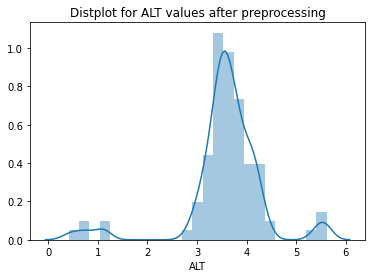

In [11]:
sns.distplot(data_train['ALT']).set(title='Distplot for ALT values after preprocessing');

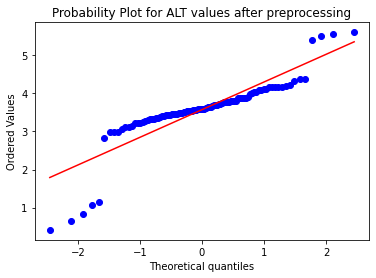

In [12]:
fig = plt.figure()
stats.probplot(data_train['ALT'], plot=plt)
plt.title('Probability Plot for ALT values after preprocessing')
plt.show()

### Save data after preprocessing to csv file

In [13]:
data_train.to_csv("../data/alt_maccsfp_after_preprocessing.csv", index = False)